In [1]:
#installing the dependencies 
#try this
%pip install pandas numpy matplotlib seaborn scikit-learn
#if it doesn't work then
#!pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [3]:
# Load the dataset
california = fetch_california_housing()

# Convert to DataFrame for easier handling
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target


In [4]:
# Load the dataset
california = fetch_california_housing()
# Convert to DataFrame for easier handling
print(california.feature_names)
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target
df.head(5)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Explore the dataset
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
X = df.drop('MedHouseVal', axis=1)  # Features
y = df['MedHouseVal']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.555891598695244
R² Score: 0.5757877060324511


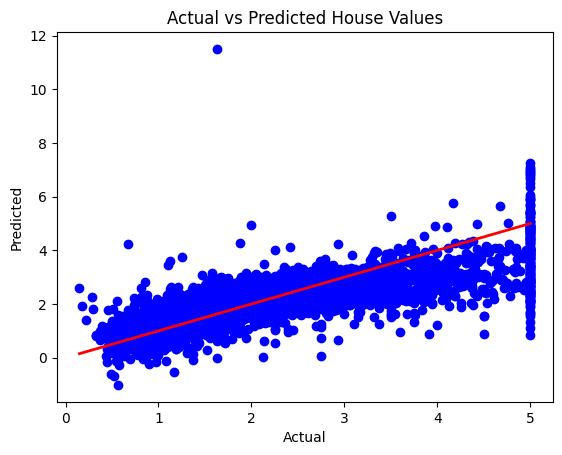

In [9]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Values')
plt.show()


In [14]:
# Make predictions on a few rows from the test set
sample_data = X_test[:10]  # Predict the first 5 rows from the test set
predictions = model.predict(sample_data)

# Display the predictions
print("Predicted House Values:", predictions)

Predicted House Values: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]


In [15]:
# Get the actual values of the first 5 rows
actual_values = y_test[:10]

# Compare predicted and actual values
comparison = pd.DataFrame({
    'Actual Values': actual_values,
    'Predicted Values': predictions
})

print(comparison)


       Actual Values  Predicted Values
20046        0.47700          0.719123
3024         0.45800          1.764017
15663        5.00001          2.709659
20484        2.18600          2.838926
9814         2.78000          2.604657
13311        1.58700          2.011754
7113         1.98200          2.645500
7668         1.57500          2.168755
18246        3.40000          2.740746
5723         4.46600          3.915615
